In [30]:
library(tidyverse)
library(gghighlight)
library(magrittr)
library(scales)

In [45]:
source("../R/alg/cma-es-csa.R")
source("../R/alg/cma-es-expth.R")
source("../R/alg/cma-es-tpat.R")
source("../R/eval-funcs.R")
source("../R/plot-funcs.R")
options(repr.plot.width=15, repr.plot.height=15)

In [46]:
eval = sphere_func
x0 = rep(100, 10)

In [47]:
csa = 
    cma_es_csa(x0, fn = eval, lower = -100, upper = 100)
tpat = 
    cma_es_tpat(x0, fn = eval, lower = -100, upper = 100)

In [48]:
ppmf_factory = function(dparams, ptargets) {
    expand.grid(
        dp = dparams,
        pt = ptargets
    ) %>%
    purrr::pmap(function(dp, pt){
        control = list(d_param = dp, p_target = pt)
        purrr::partial(cma_es_ppmf, control = control)
    })
}
sigma_plot = function(dfx){ 
    dfx %>% ggplot2::ggplot(aes(x = t, y = sigma, col = label2)) +
    ggplot2::geom_line() +
    ggplot2::geom_point() +
   ggplot2::scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
    theme_bw() +# facet_wrap( ~ dp) + 
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        strip.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold")
    )
}

In [49]:
sigma_exp = function(fns, Ns) {
    expand.grid(
        f = fns,
        N = Ns
    ) %>%
    purrr::pmap(function(f, N) {
        tryCatch({
            result = f(x0, fn = eval, lower = -100, upper = 100)
              t = length(result$diagnostic$sigma)
            tibble::tibble(
                t = 1:t,
                N = N,
                sigma = result$diagnostic$sigma,
                label = result$label,
            )
        }, error = function(error) {
            print(error)
            return(NA)
        })
    })
}

In [50]:
d_param = c(0.1, 0.5, 0.6, 0.8, .9,  1, 2, 2.5, 3, 4, 5, 10, 50, 100)
p_target = 0.5#c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6)

In [51]:
ppmfs = ppmf_factory(d_param, p_target)

In [52]:
results = ppmfs %>% sigma_exp(Ns = c(10))

In [54]:
sigma_df = results[!is.na(results)] %>% purrr::reduce(dplyr::bind_rows)

In [55]:
csa_sigma =
    tibble::tibble(
        t = 1:length(csa$diagnostic$sigma),
        N = 10,
        sigma = csa$diagnostic$sigma,
        label = "CSA",
        dp = ".",
        pt = ".",
        label2 = "CSA"
    )
tpa_sigma =
    tibble::tibble(
        t = 1:length(tpat$diagnostic$sigma),
        N = 10,
        sigma = tpat$diagnostic$sigma,
        label = "TPA",
        dp = "..",
        pt = "..",
        label2 = "TPA"
    )
  

In [56]:
sigma_df %<>% dplyr::mutate(
    dp = stringr::str_extract(label, "dp-(\\d.*)(?=-pt)"),
    pt = stringr::str_extract(label, "pt-(\\d.*)"),
    label2 = stringr::str_extract(label, "dp-(\\d.*)")
)

In [57]:
sigma_df_ext = dplyr::bind_rows(sigma_df, csa_sigma, tpa_sigma)

# Sphere function, x0 = (100, ..., 100), P_target = 0.5

Warning message:
“Tried to calculate with group_by(), but the calculation failed.
Falling back to ungrouped filter operation...”
Warning message:
“Tried to calculate with group_by(), but the calculation failed.
Falling back to ungrouped filter operation...”
label_key: label2

label_key: label2



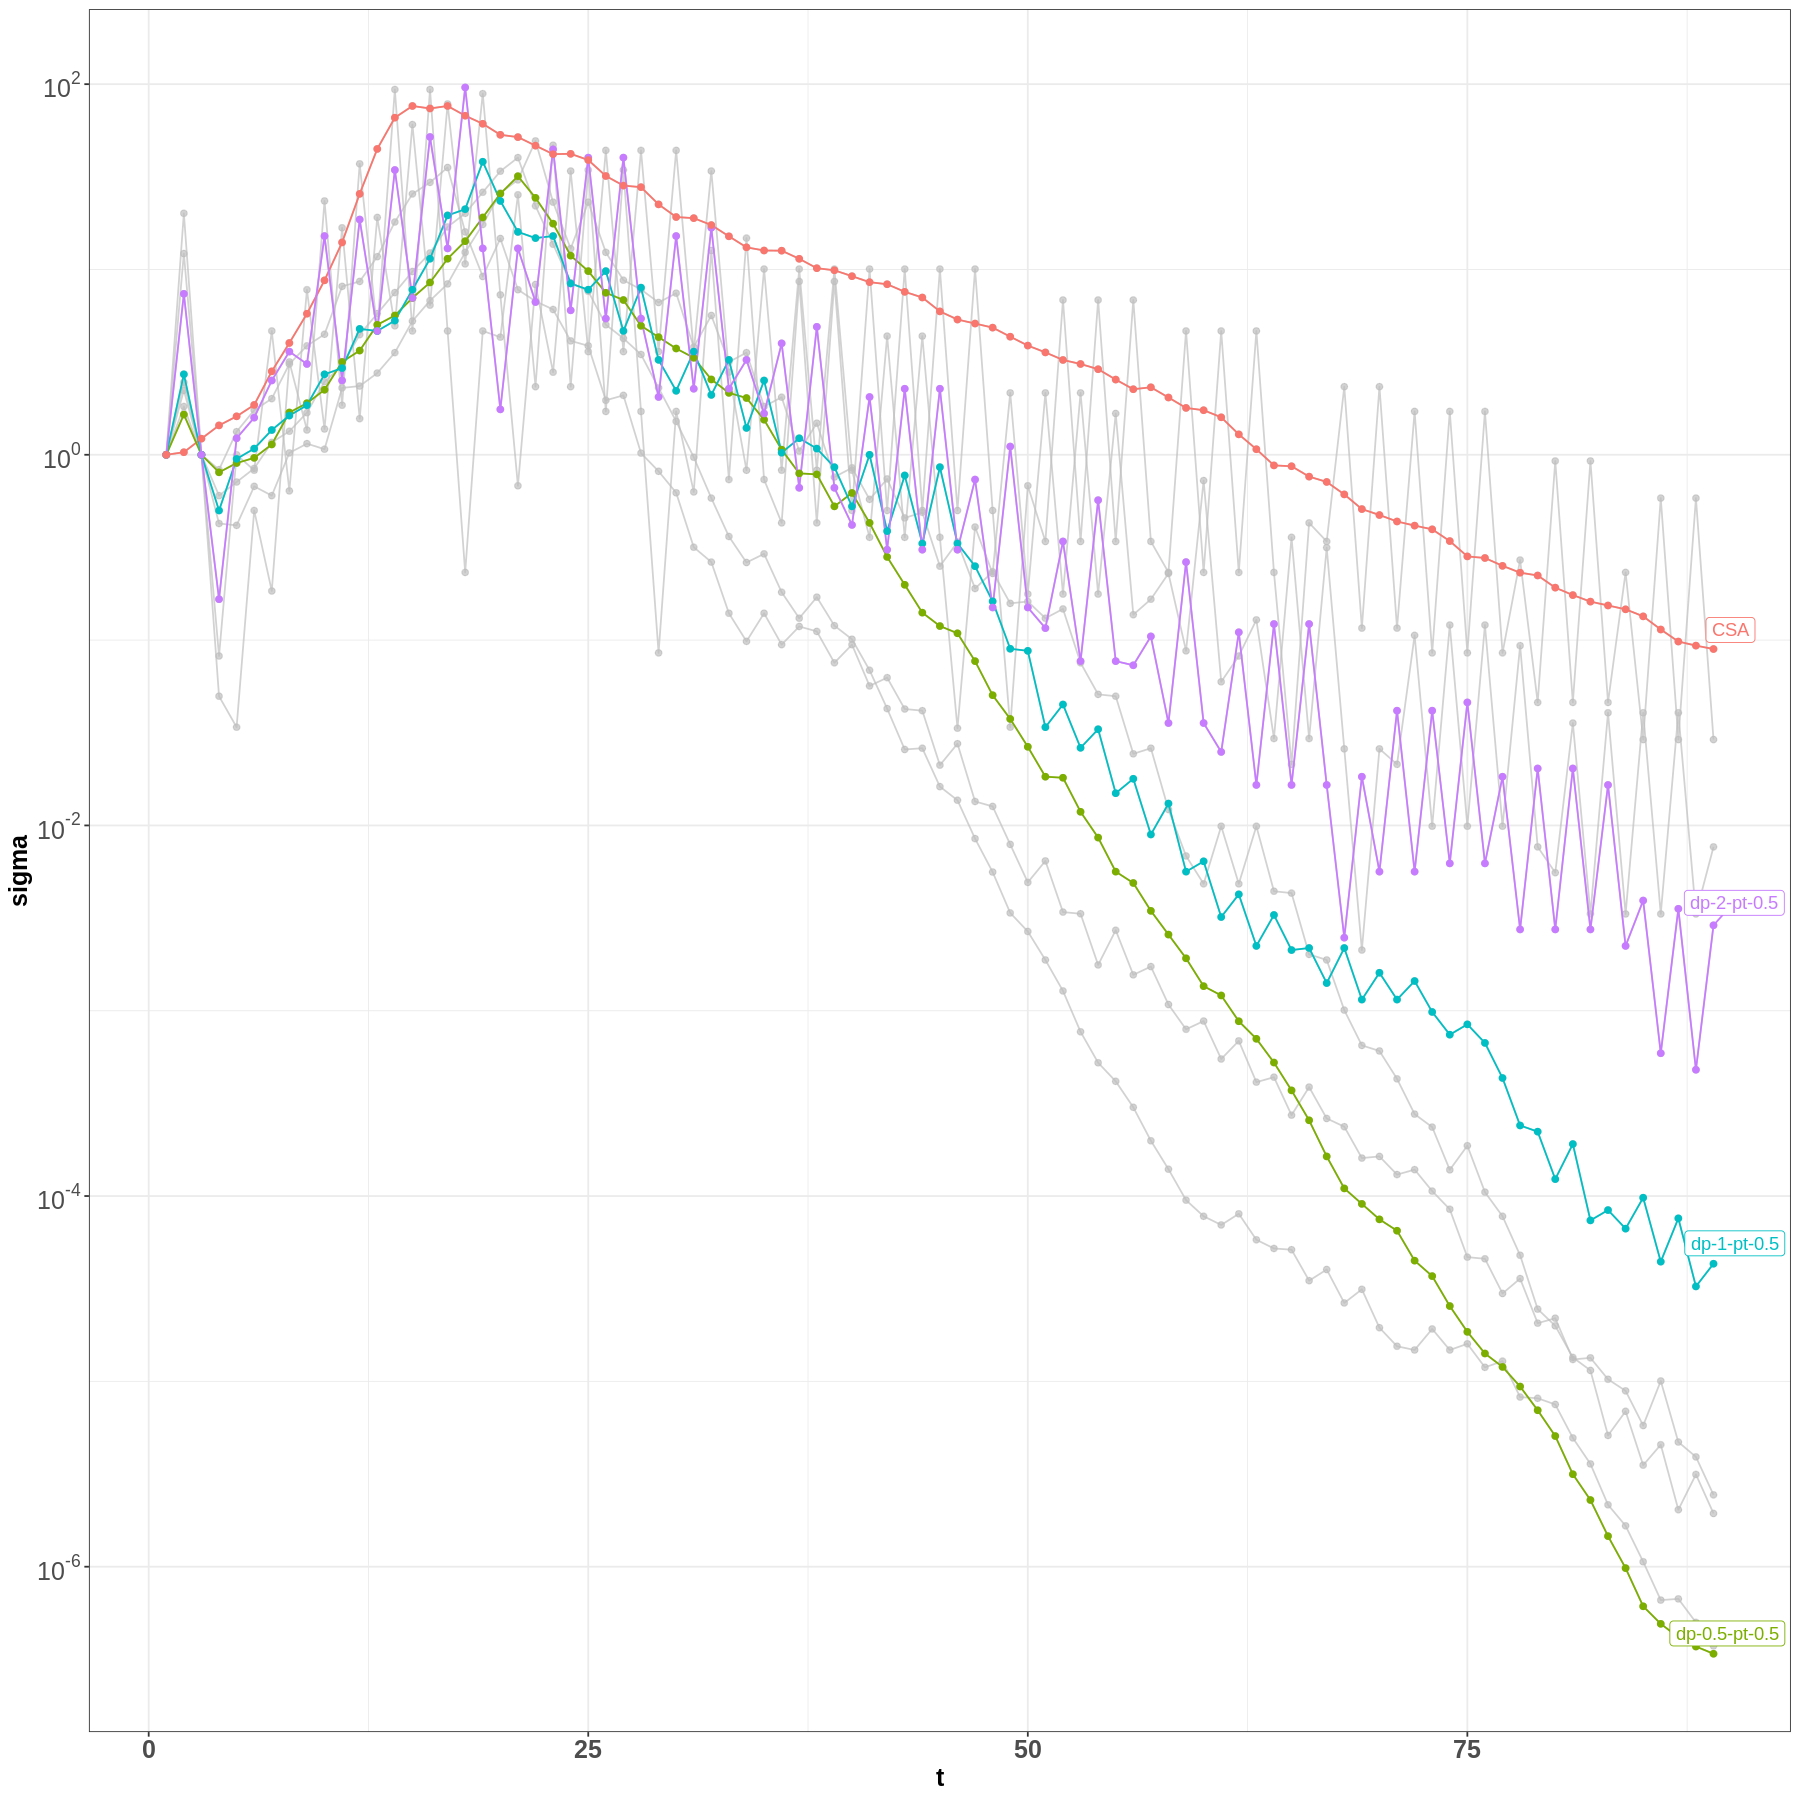

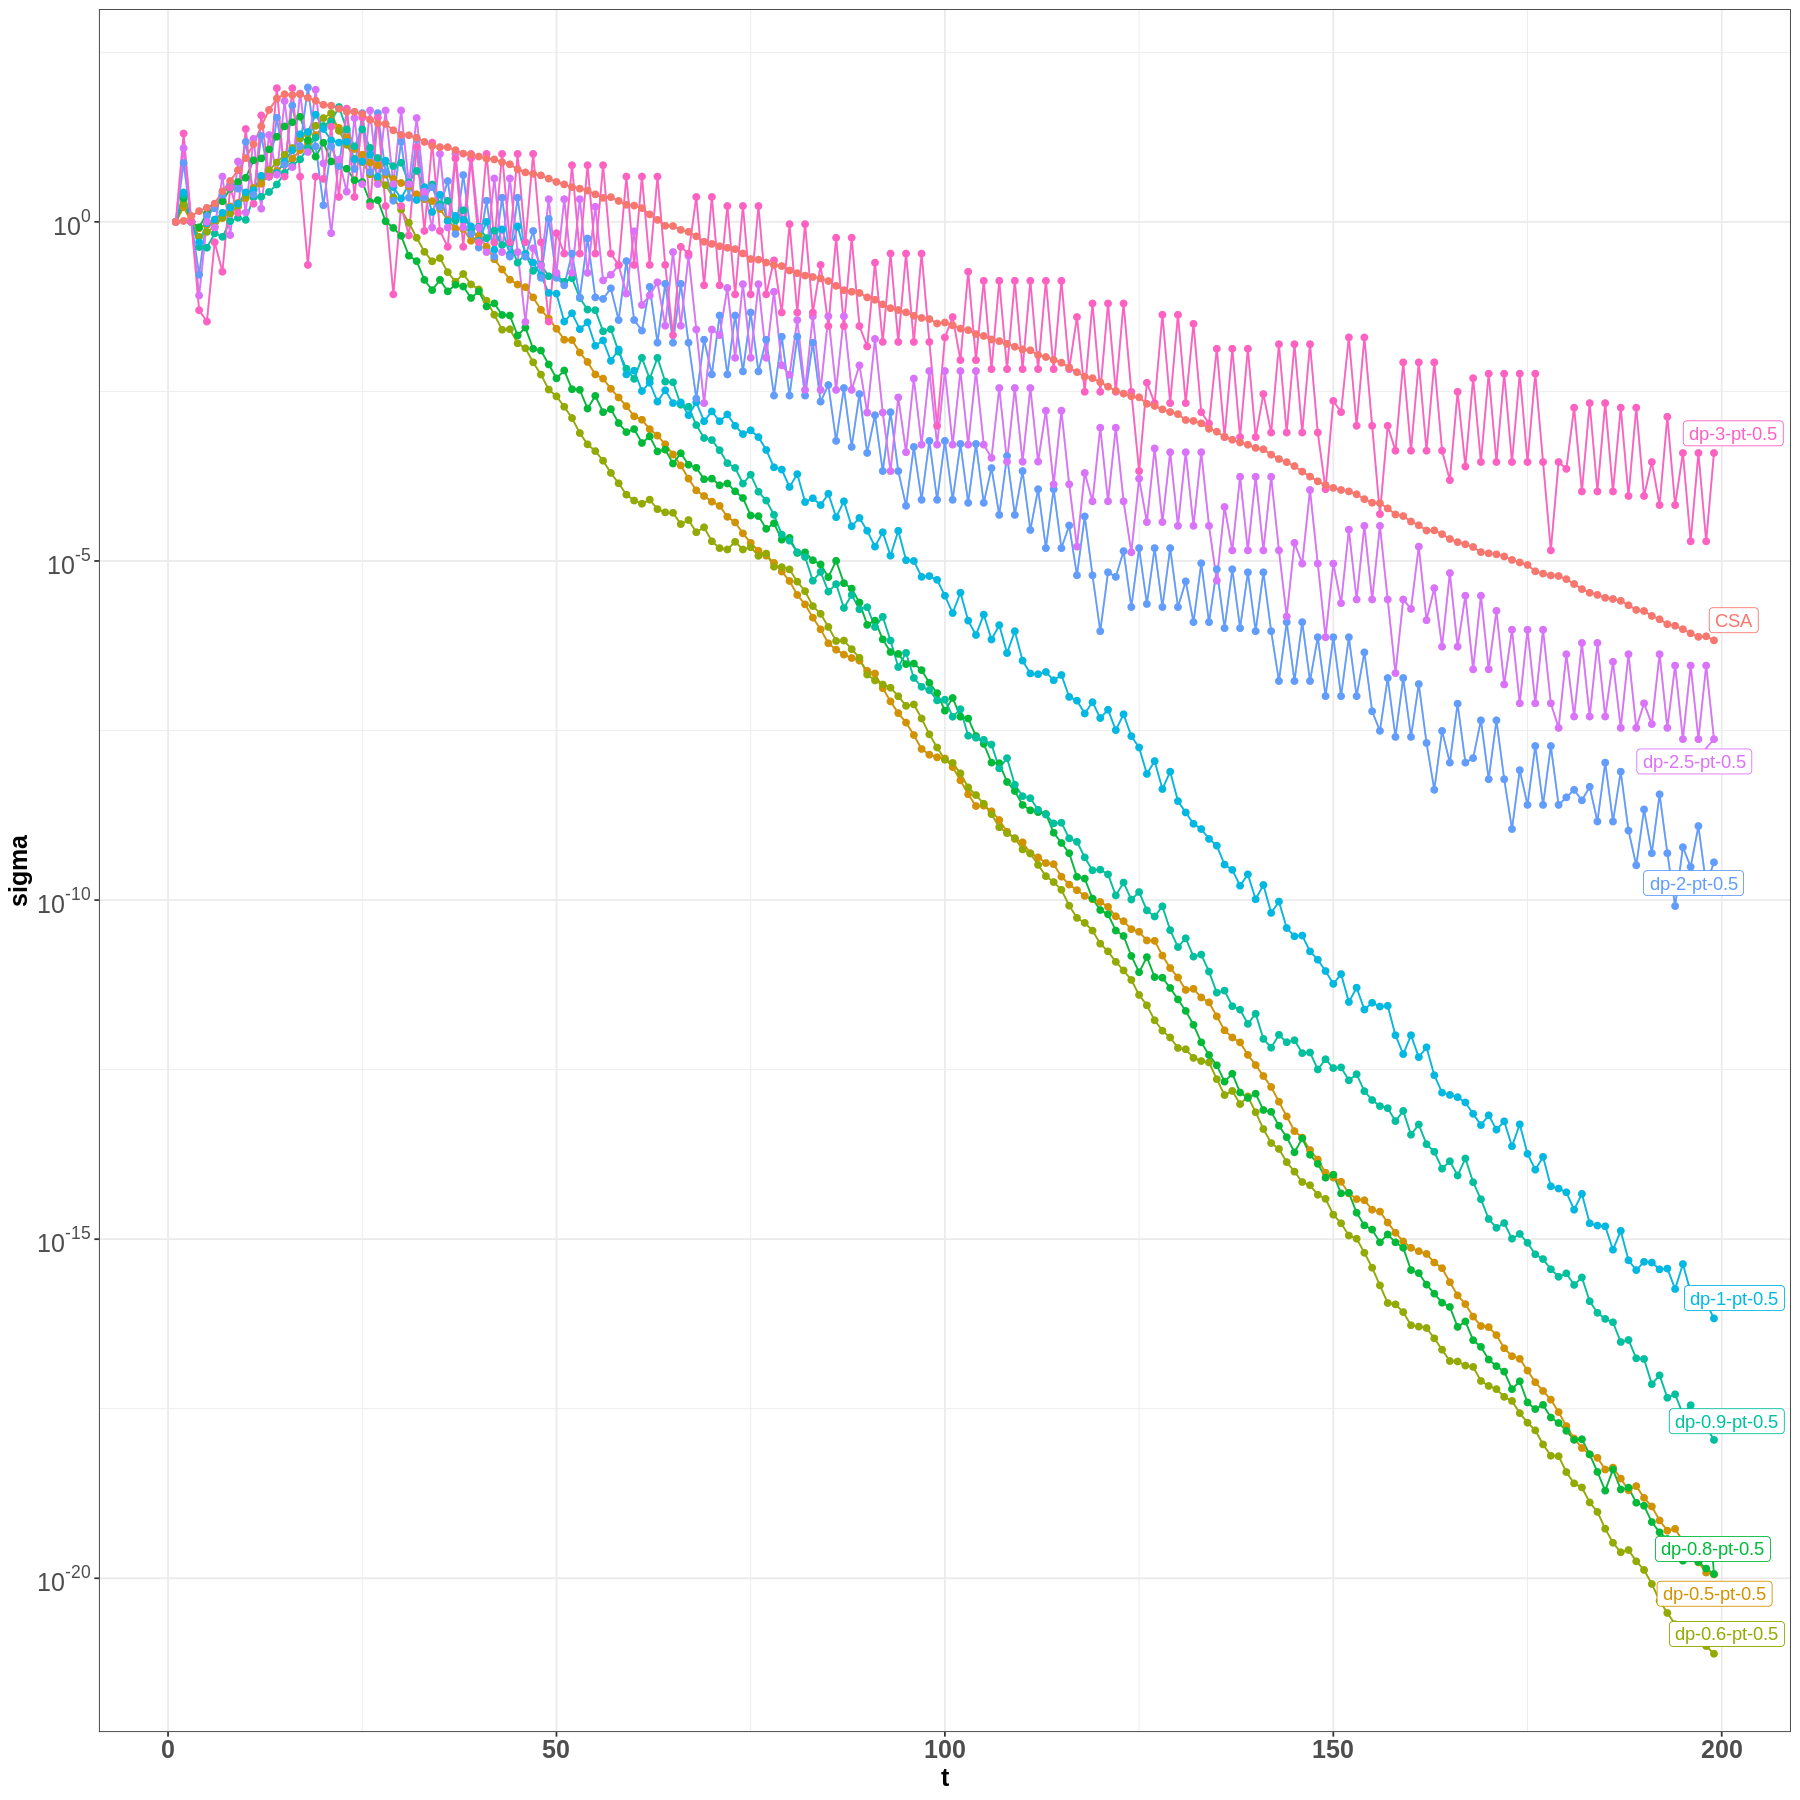

In [70]:
sigma_df_ext %>% dplyr::filter(t < 90,label %in% c("CSA",
                                         #   "TPA",
                                            "cma-es-ppmf-dp-0.5-pt-0.5",
                                           "cma-es-ppmf-dp-0.6-pt-0.5",
                                            "cma-es-ppmf-dp-0.8-pt-0.5",
                                            "cma-es-ppmf-dp-0.9-pt-0.5",
                                            "cma-es-ppmf-dp-1-pt-0.5",
                                            "cma-es-ppmf-dp-2-pt-0.5",
                                            "cma-es-ppmf-dp-2.5-pt-0.5",
                                            "cma-es-ppmf-dp-3-pt-0.5"
                                           # "cma-es-ppmf-dp-4-pt-0.5",
                                         #    "cma-es-ppmf-dp-5-pt-0.5"
                                        #     "cma-es-ppmf-dp-10-pt-0.5"
                                            # "cma-es-ppmf-dp-100-pt-0.5"
                                           )) %>% 
    sigma_plot() +  gghighlight::gghighlight(label2 %in% c("CSA", "dp-2-pt-0.5", "dp-1-pt-0.5", "dp-0.5-pt-0.5"))
sigma_df_ext %>% dplyr::filter(t < 200,label %in% c("CSA",
                                      #      "TPA",
                                            "cma-es-ppmf-dp-0.5-pt-0.5",
                                           "cma-es-ppmf-dp-0.6-pt-0.5",
                                            "cma-es-ppmf-dp-0.8-pt-0.5",
                                            "cma-es-ppmf-dp-0.9-pt-0.5",
                                            "cma-es-ppmf-dp-1-pt-0.5",
                                            "cma-es-ppmf-dp-2-pt-0.5",
                                            "cma-es-ppmf-dp-2.5-pt-0.5",
                                            "cma-es-ppmf-dp-3-pt-0.5"
                                        #    "cma-es-ppmf-dp-4-pt-0.5",
                                        #     "cma-es-ppmf-dp-5-pt-0.5"
                                        #     "cma-es-ppmf-dp-10-pt-0.5"
                                            # "cma-es-ppmf-dp-100-pt-0.5"
                                           )) %>% 
    sigma_plot() +  gghighlight::gghighlight(is.character(label2), )

label_key: label2

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


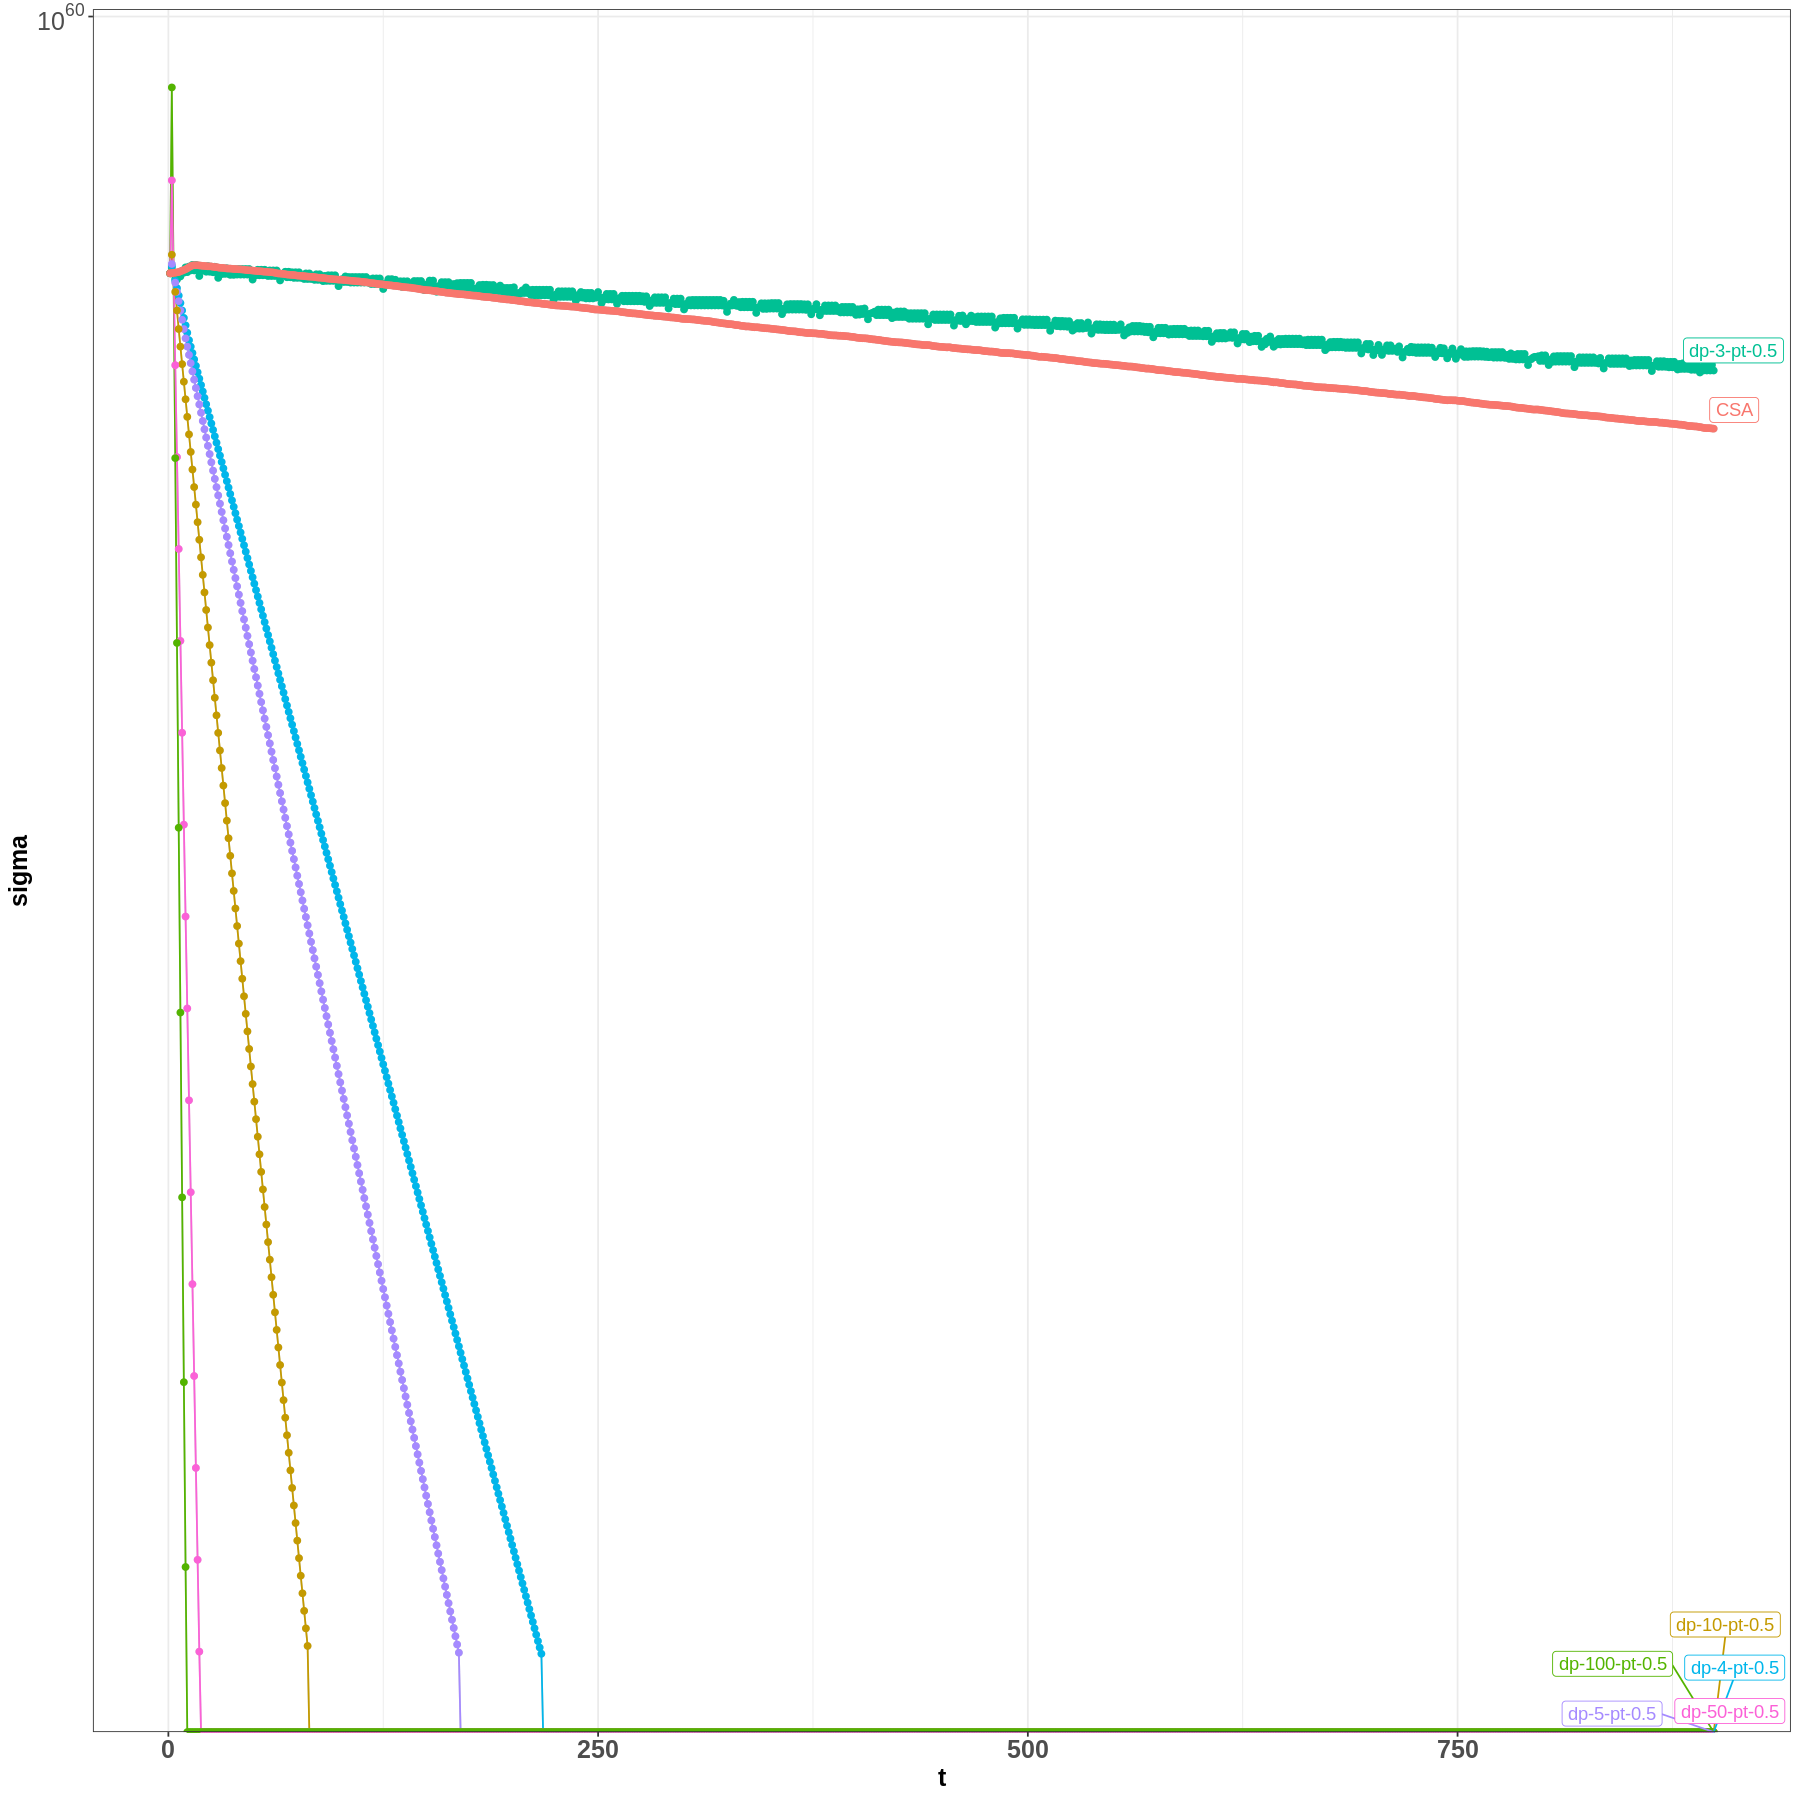

In [59]:
sigma_df_ext %>% dplyr::filter(t < 900,label %in% c("CSA",
                                                    "cma-es-ppmf-dp-3-pt-0.5",
                                                    "cma-es-ppmf-dp-4-pt-0.5",
                                                    "cma-es-ppmf-dp-5-pt-0.5",
                                             "cma-es-ppmf-dp-10-pt-0.5",
                                             "cma-es-ppmf-dp-50-pt-0.5",
                                             "cma-es-ppmf-dp-100-pt-0.5"
                                           )) %>% 
    sigma_plot() +  gghighlight::gghighlight(is.character(label2))

In [60]:
ppmfs2 = ppmf_factory(d_param, c(0.1))

In [61]:
results2 = ppmfs2 %>% sigma_exp(Ns = c(10))

In [62]:
sigma_df2 = results2[!is.na(results2)] %>% purrr::reduce(dplyr::bind_rows)

In [63]:
sigma_df2 %<>% dplyr::mutate(
    dp = stringr::str_extract(label, "dp-(\\d.*)(?=-pt)"),
    pt = stringr::str_extract(label, "pt-(\\d.*)"),
    label2 = stringr::str_extract(label, "dp-(\\d.*)")
)

# Sphere function, x0 = (100, ..., 100), P_target = 0.1

In [64]:
sigma_df_ext2 = dplyr::bind_rows(sigma_df2, csa_sigma, tpa_sigma)

label_key: label2

label_key: label2



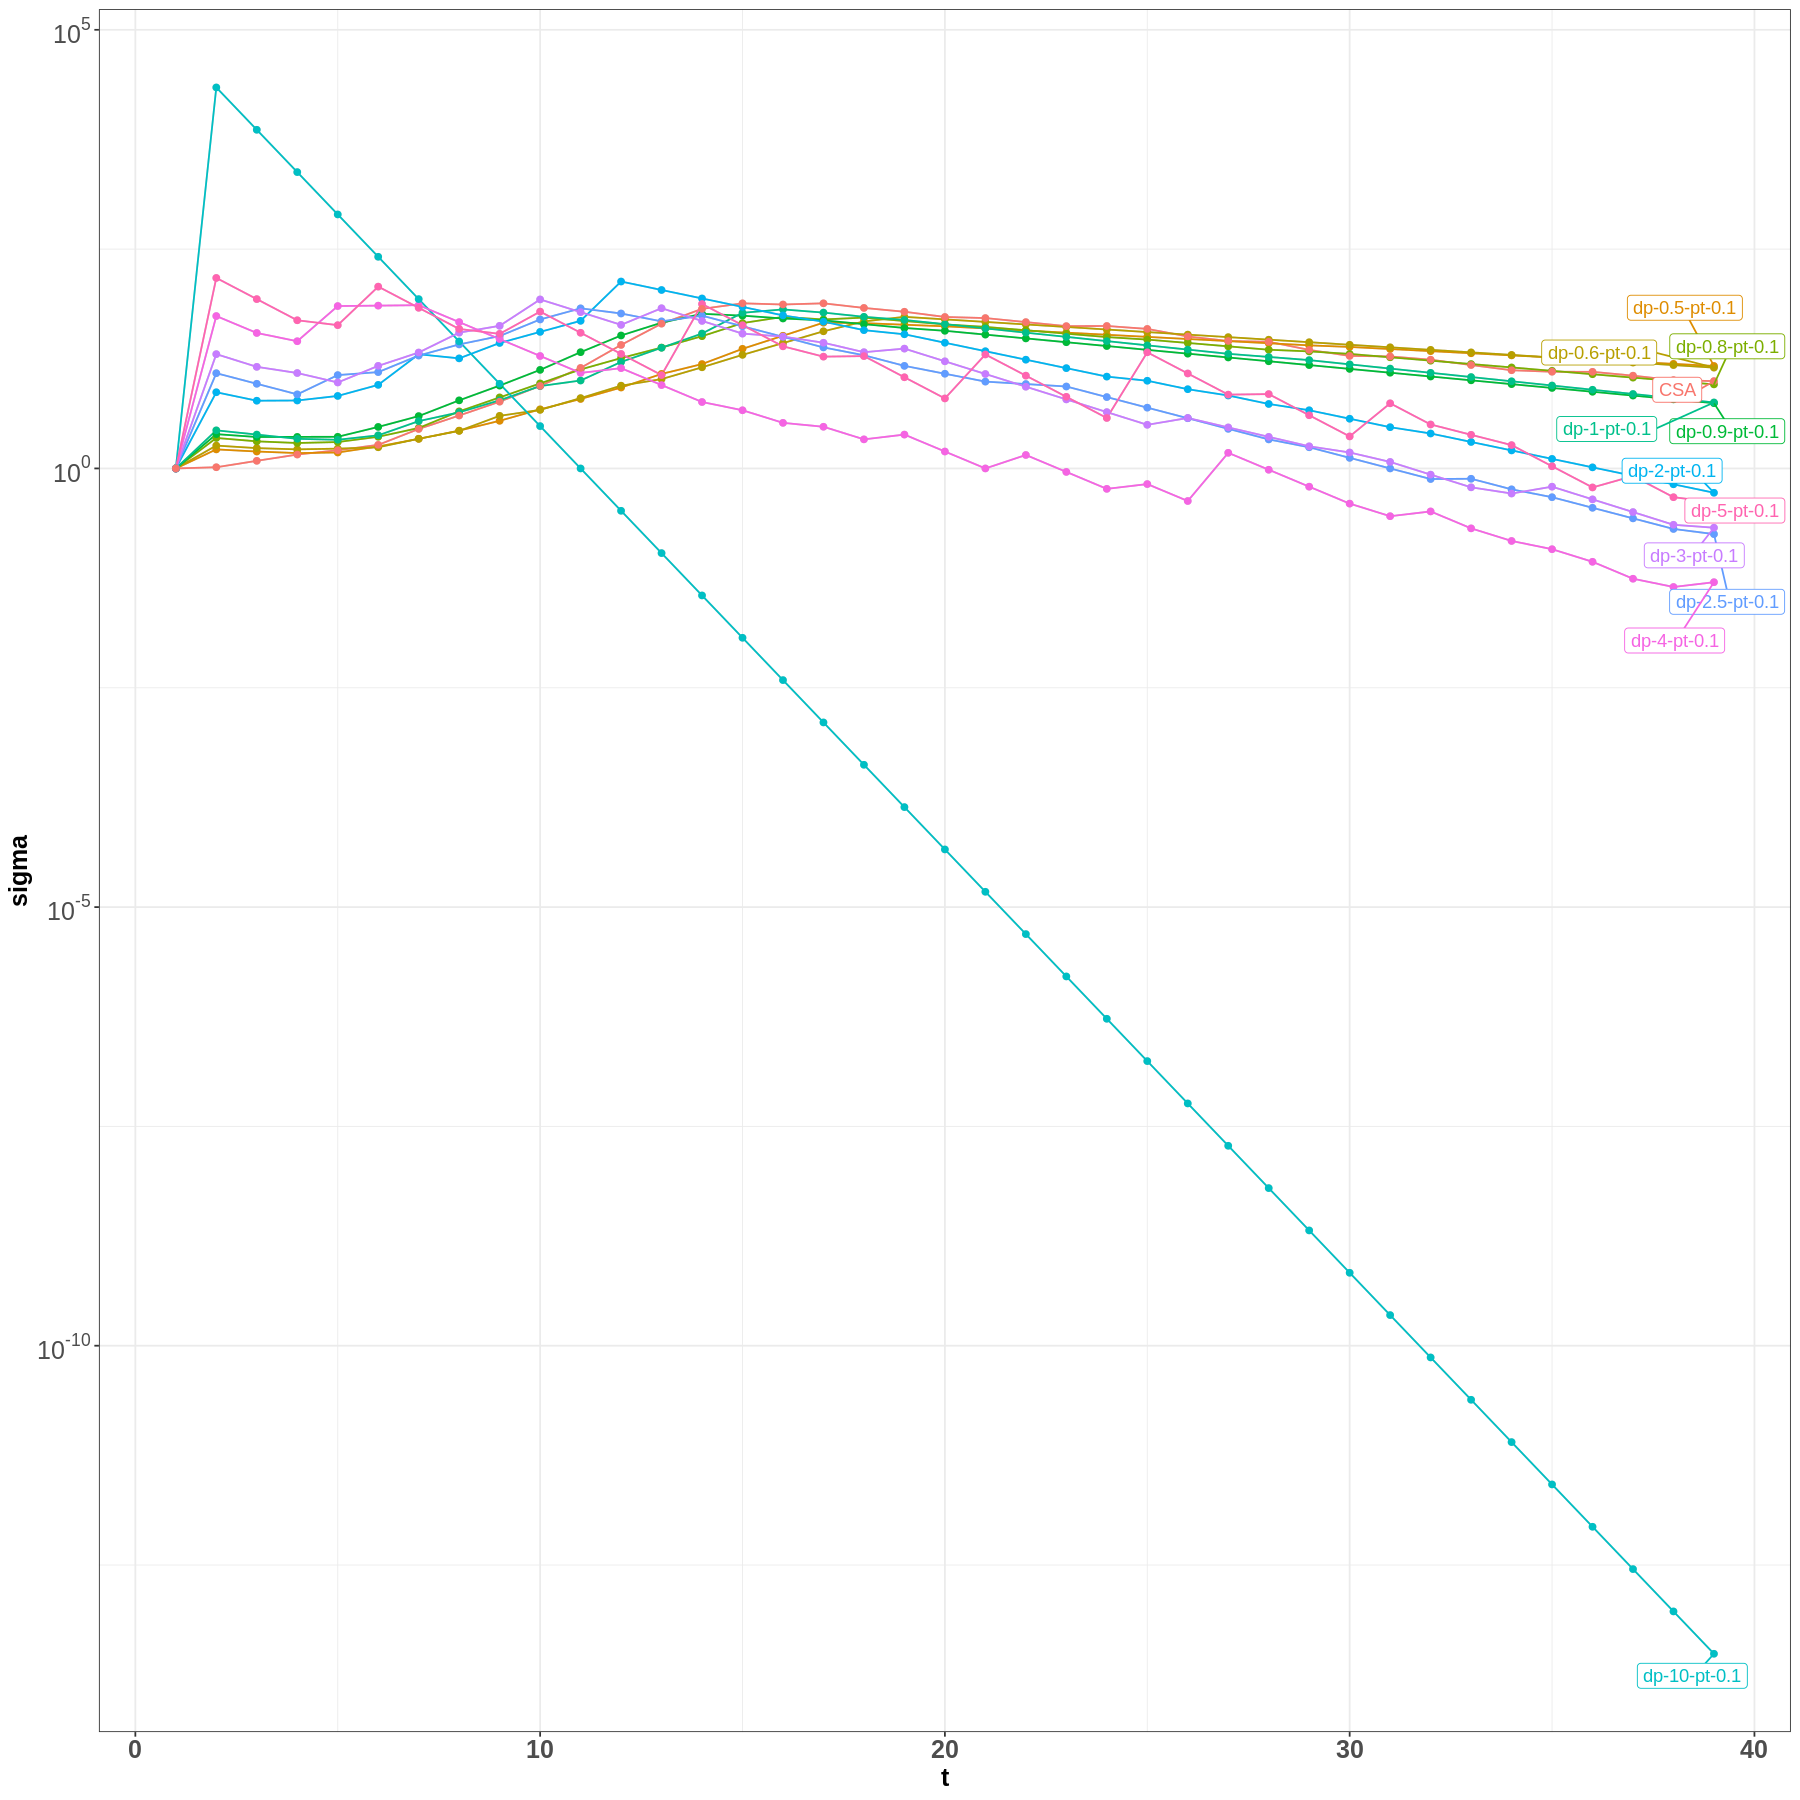

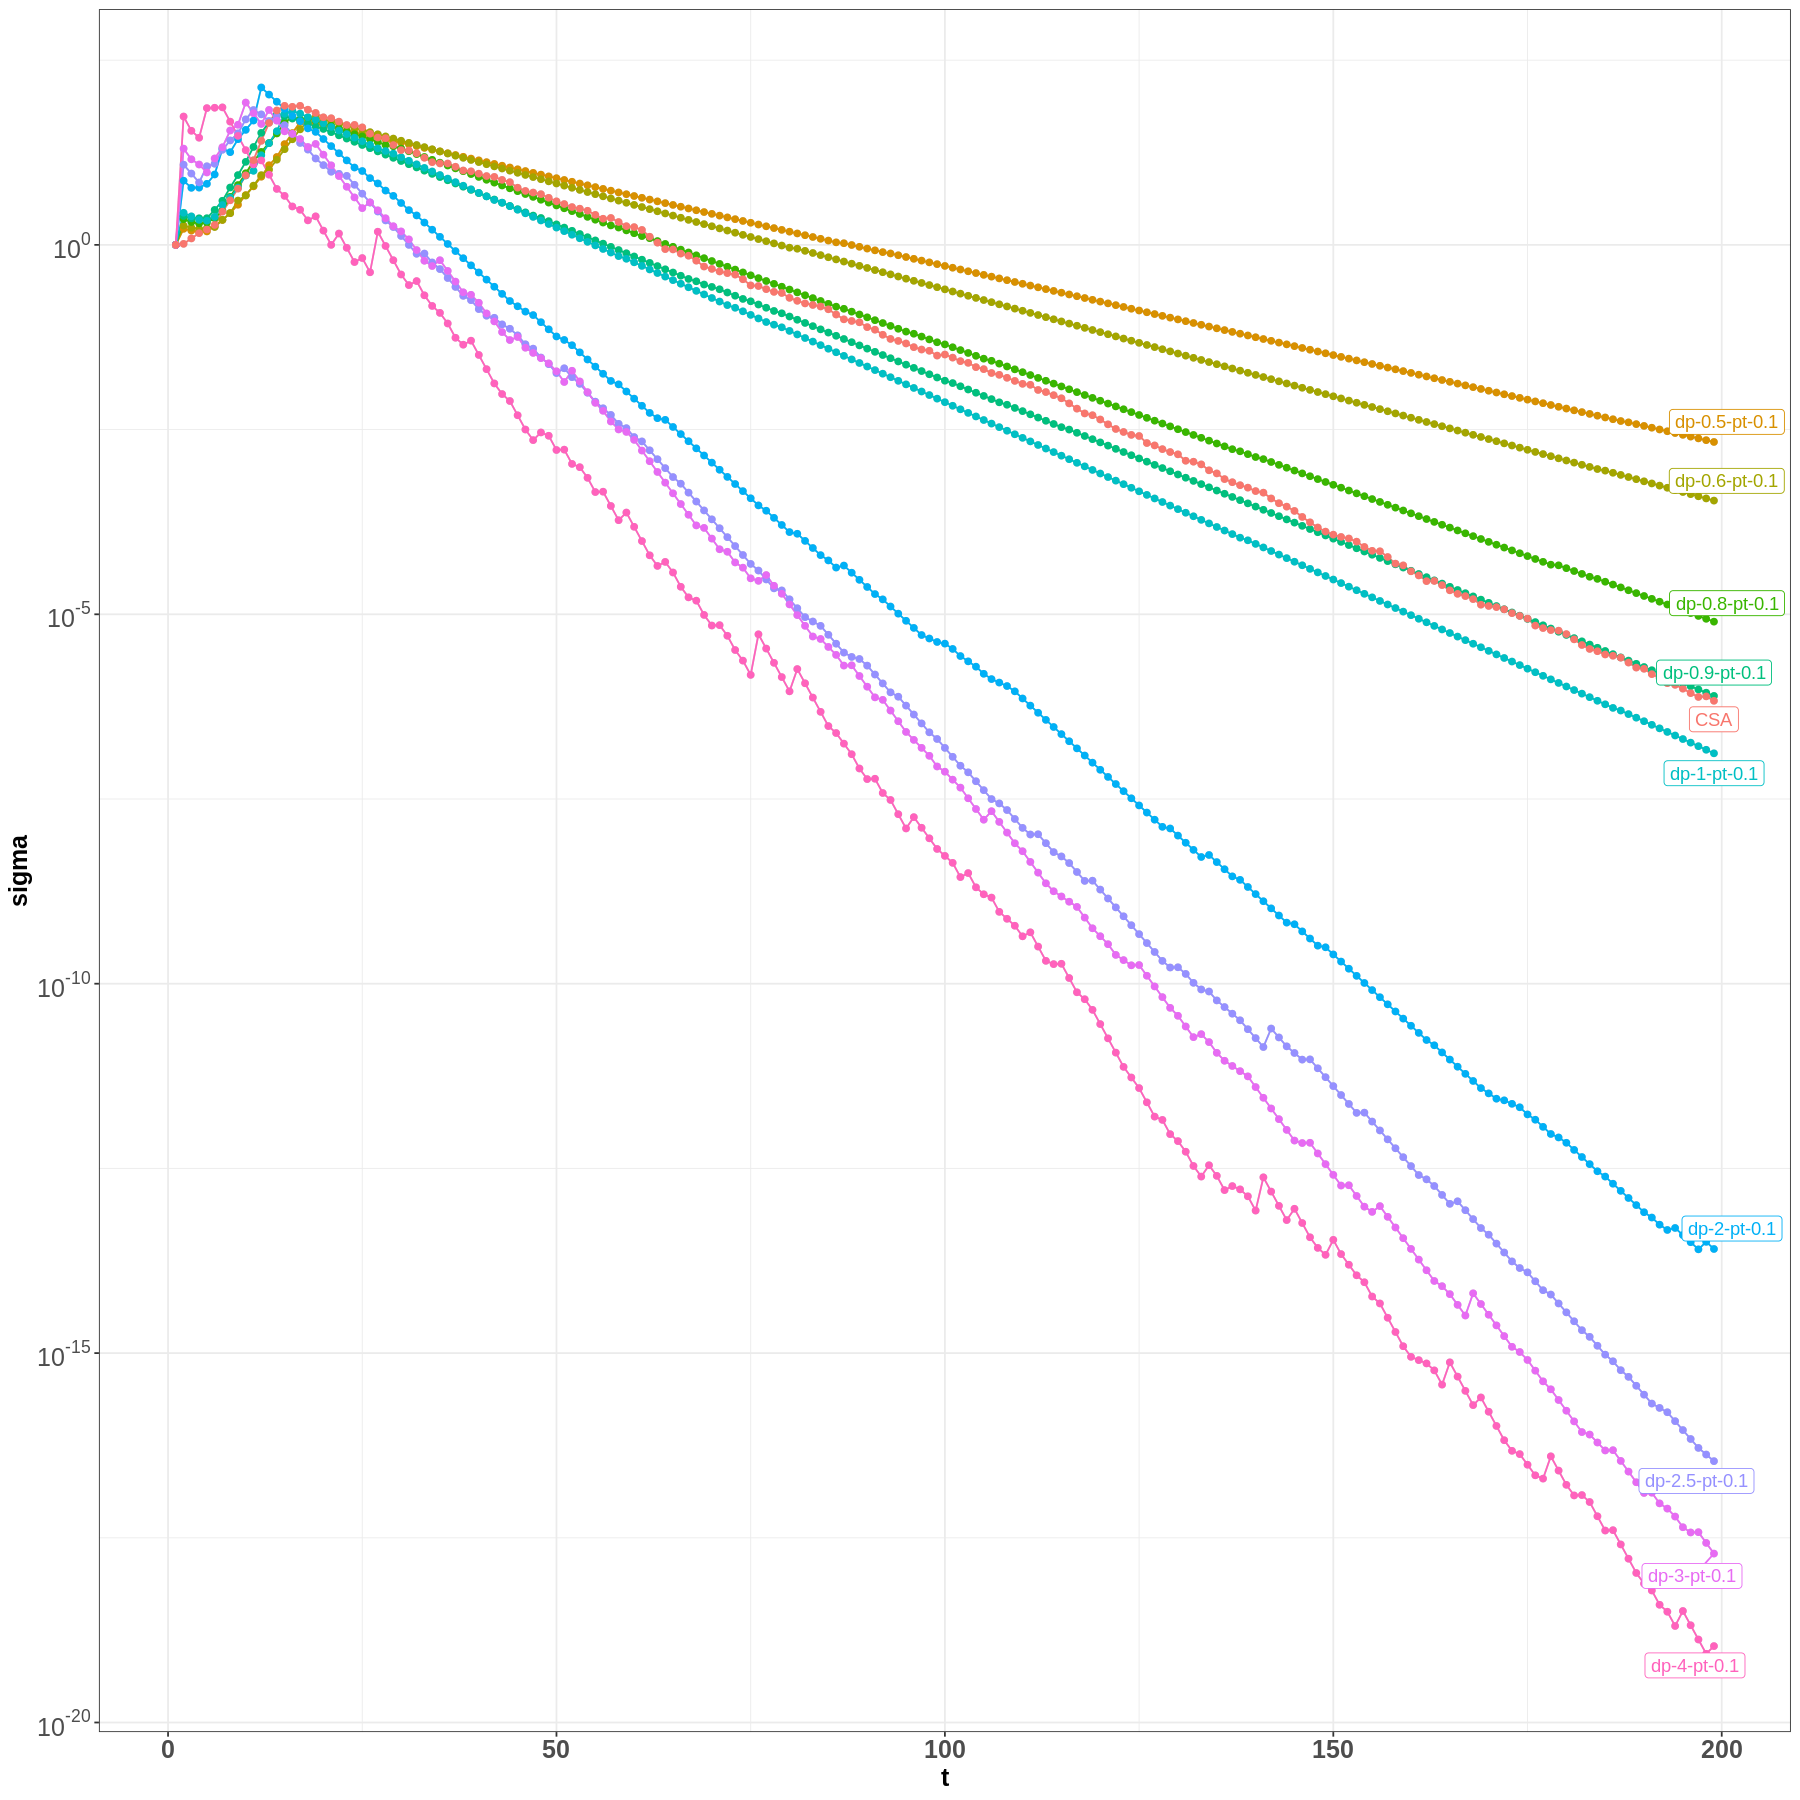

In [65]:
sigma_df_ext2 %>% dplyr::filter(t < 40, label %in% c("CSA",
                                           # "TPA",
                                            "cma-es-ppmf-dp-0.5-pt-0.1",
                                           "cma-es-ppmf-dp-0.6-pt-0.1",
                                            "cma-es-ppmf-dp-0.8-pt-0.1",
                                            "cma-es-ppmf-dp-0.9-pt-0.1",
                                            "cma-es-ppmf-dp-1-pt-0.1",
                                            "cma-es-ppmf-dp-2-pt-0.1",
                                            "cma-es-ppmf-dp-2.5-pt-0.1",
                                            "cma-es-ppmf-dp-3-pt-0.1",
                                            "cma-es-ppmf-dp-4-pt-0.1",
                                             "cma-es-ppmf-dp-5-pt-0.1",
                                             "cma-es-ppmf-dp-10-pt-0.1"
                                             #"cma-es-ppmf-dp-100-pt-0.1"
                                           )) %>% 
    sigma_plot() +  gghighlight::gghighlight(is.character(label2))
sigma_df_ext2 %>% dplyr::filter(t < 200, label %in% c("CSA",
                                           # "TPA",
                                            "cma-es-ppmf-dp-0.5-pt-0.1",
                                           "cma-es-ppmf-dp-0.6-pt-0.1",
                                            "cma-es-ppmf-dp-0.8-pt-0.1",
                                            "cma-es-ppmf-dp-0.9-pt-0.1",
                                            "cma-es-ppmf-dp-1-pt-0.1",
                                            "cma-es-ppmf-dp-2-pt-0.1",
                                            "cma-es-ppmf-dp-2.5-pt-0.1",
                                            "cma-es-ppmf-dp-3-pt-0.1",
                                            "cma-es-ppmf-dp-4-pt-0.1"
                                            # "cma-es-ppmf-dp-5-pt-0.1",
                                            # "cma-es-ppmf-dp-10-pt-0.1"
                                             #"cma-es-ppmf-dp-100-pt-0.1"
                                           )) %>% 
    sigma_plot() +  gghighlight::gghighlight(is.character(label2))

label_key: label2

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


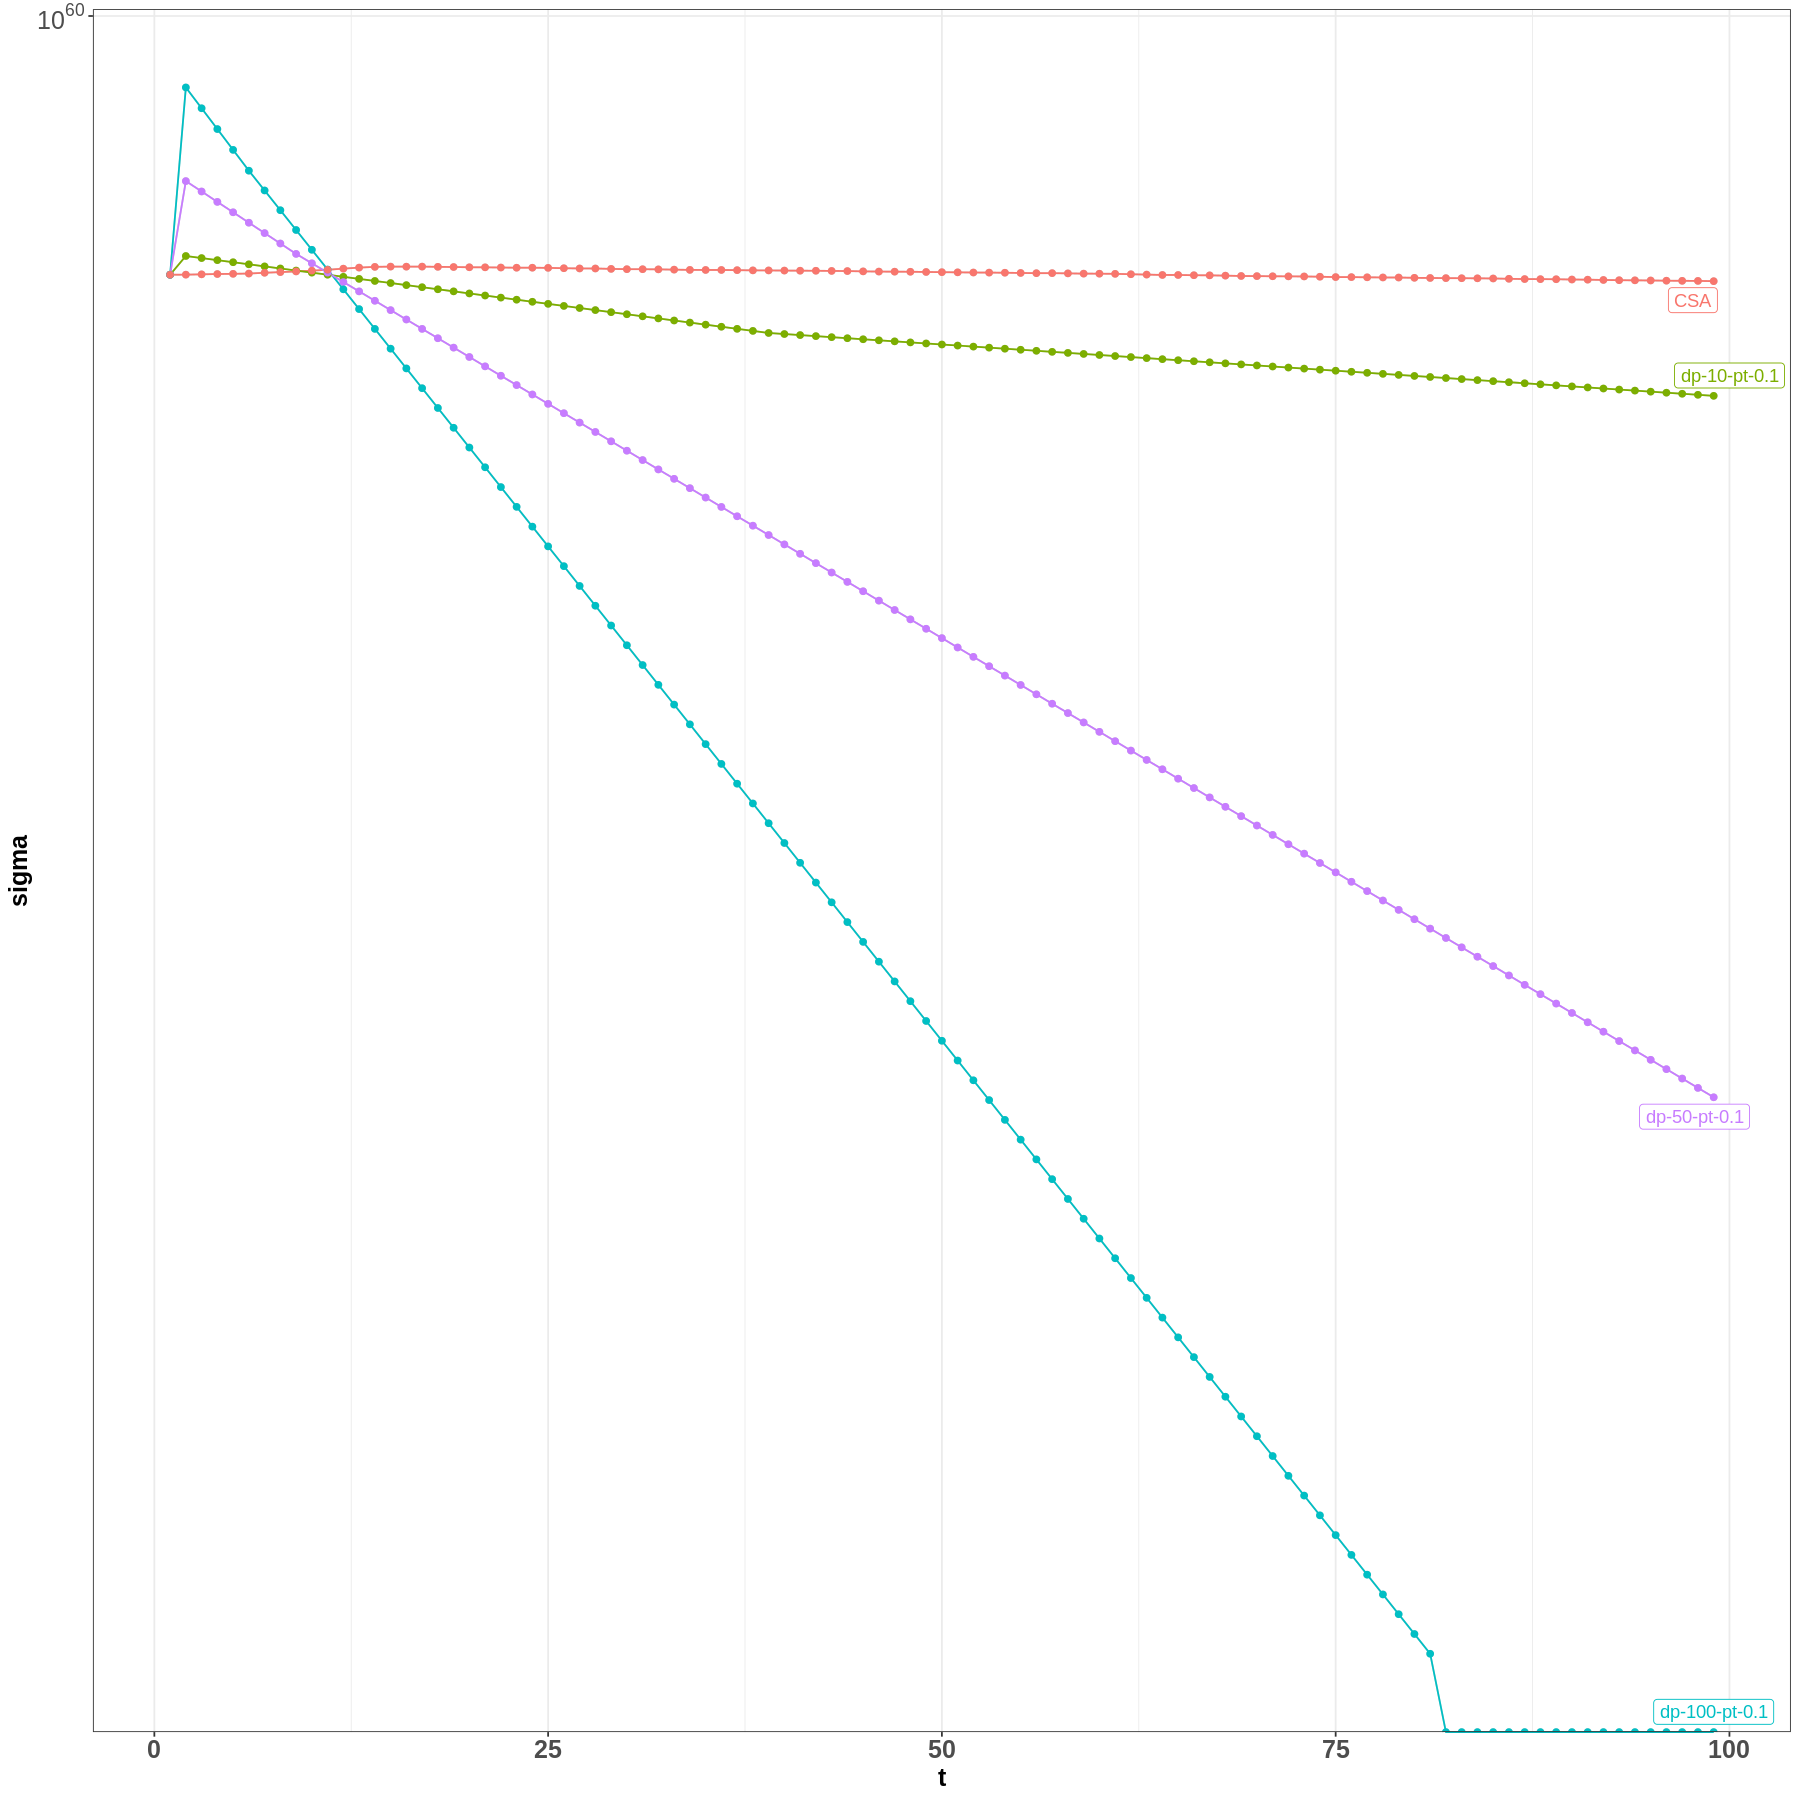

In [66]:
sigma_df_ext2 %>% dplyr::filter(t < 100,label %in% c("CSA",
                                            #"TPA",
                                             "cma-es-ppmf-dp-10-pt-0.1",
                                             "cma-es-ppmf-dp-50-pt-0.1",
                                             "cma-es-ppmf-dp-100-pt-0.1"
                                           )) %>% 
    sigma_plot() +  gghighlight::gghighlight(is.character(label2))